In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
url = "https://www.ugcs.gov.hk/datagovhk/Graduate_Employment_Situation(Eng).csv"
#https://data.gov.hk/en-data/dataset/hk-ugc-ugc-student-ges-statistics
hk = pd.read_csv(url)

# посмотрим составляющие датасета
hk.keys()

Index(['Academic Year', 'University', 'Level of study', 'Employment Situation',
       'Occupation', 'Number of Graduates (Headcount)'],
      dtype='object')

In [4]:
students_count = hk['Number of Graduates (Headcount)'].sum()
print("Number of students:", students_count)
universities_count = hk['University'].nunique()

print("Number of universities in the dataset:", universities_count)
universities = hk['University'].unique()
for university in universities:
    print(university)

Number of students: 269757
Number of universities in the dataset: 8
City University of Hong Kong
Hong Kong Baptist University
Lingnan University
The Chinese University of Hong Kong
The Education University of Hong Kong
The Hong Kong Polytechnic University
The Hong Kong University of Science and Technology
The University of Hong Kong


сравним с данными https://www.unipage.net/ru/universities_hong_kong

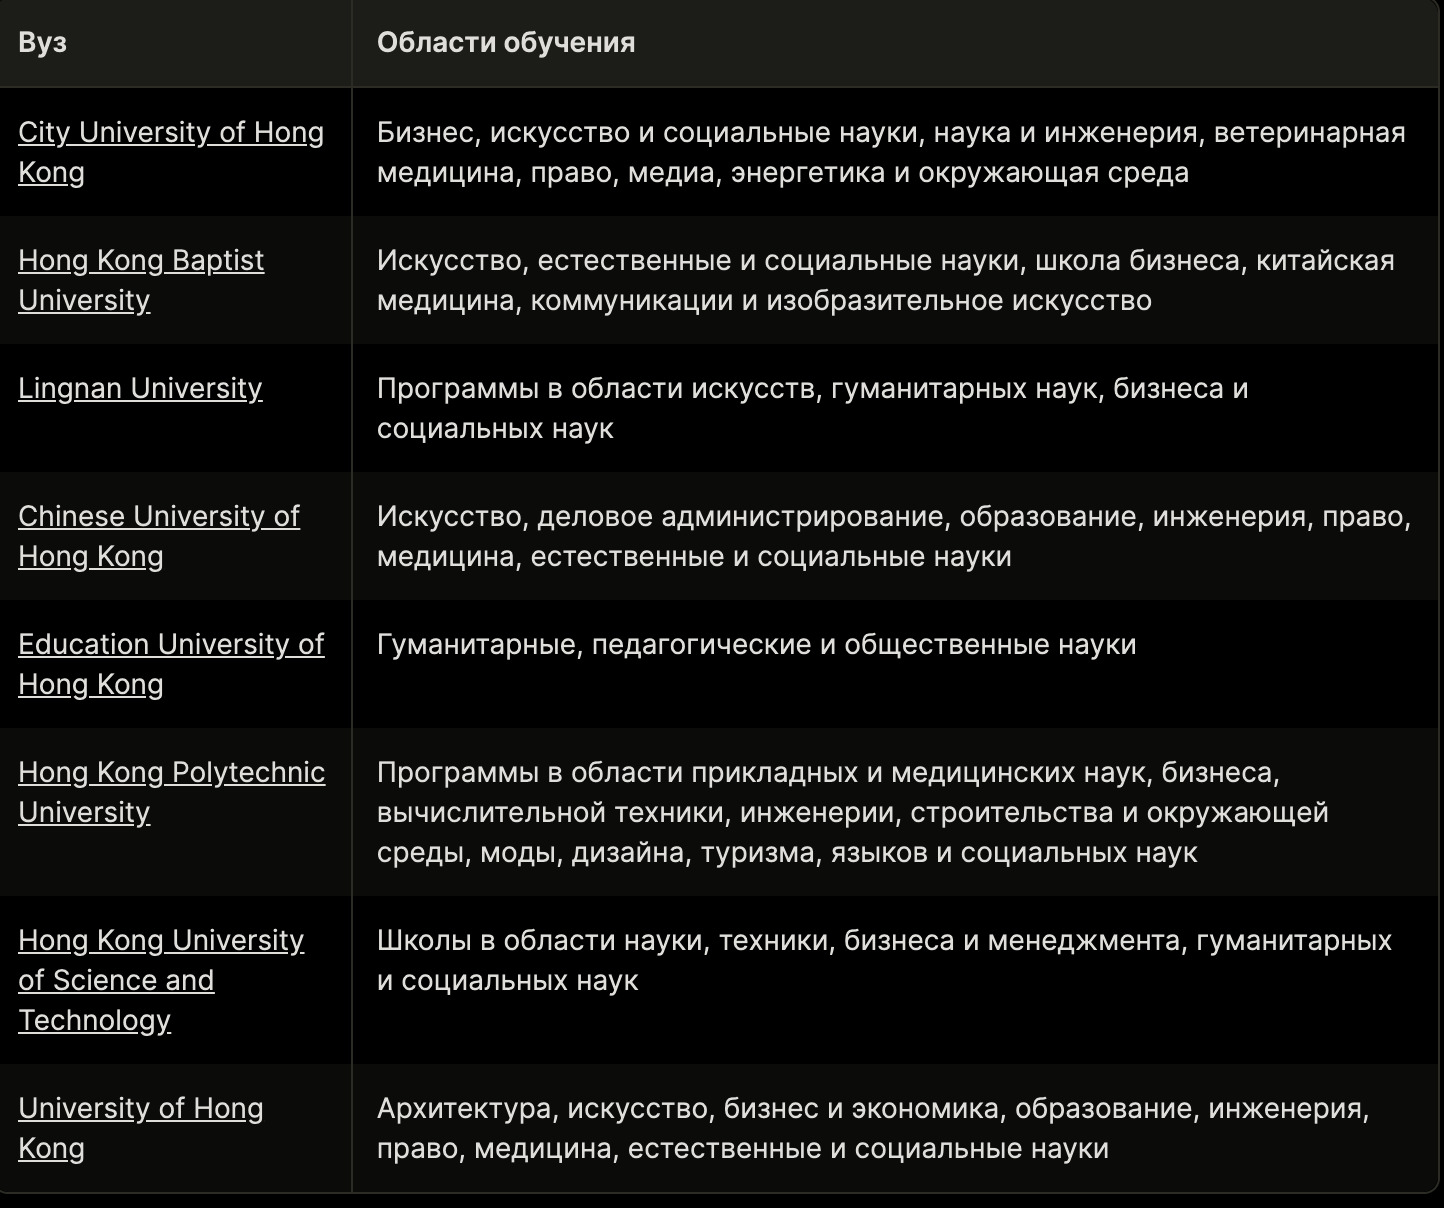

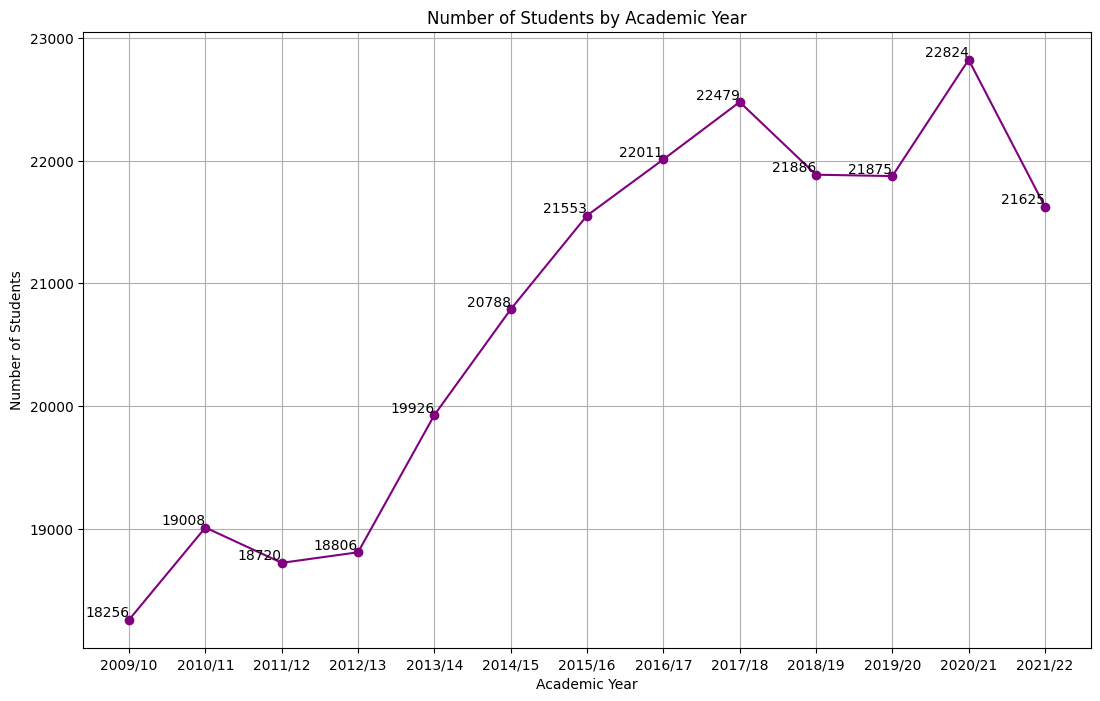

In [5]:
students_by_year = hk.groupby('Academic Year')['Number of Graduates (Headcount)'].sum().reset_index()

# Display the table

plt.figure(figsize=(13, 8))
plt.plot(students_by_year['Academic Year'], students_by_year['Number of Graduates (Headcount)'], marker='o', color='purple')
plt.title('Number of Students by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.grid(True)
for i, txt in enumerate(students_by_year['Number of Graduates (Headcount)']):
    plt.text(students_by_year['Academic Year'][i], txt, str(txt), ha='right', va='bottom')

plt.show()
plt.style.use('default')

Number of students: 269757


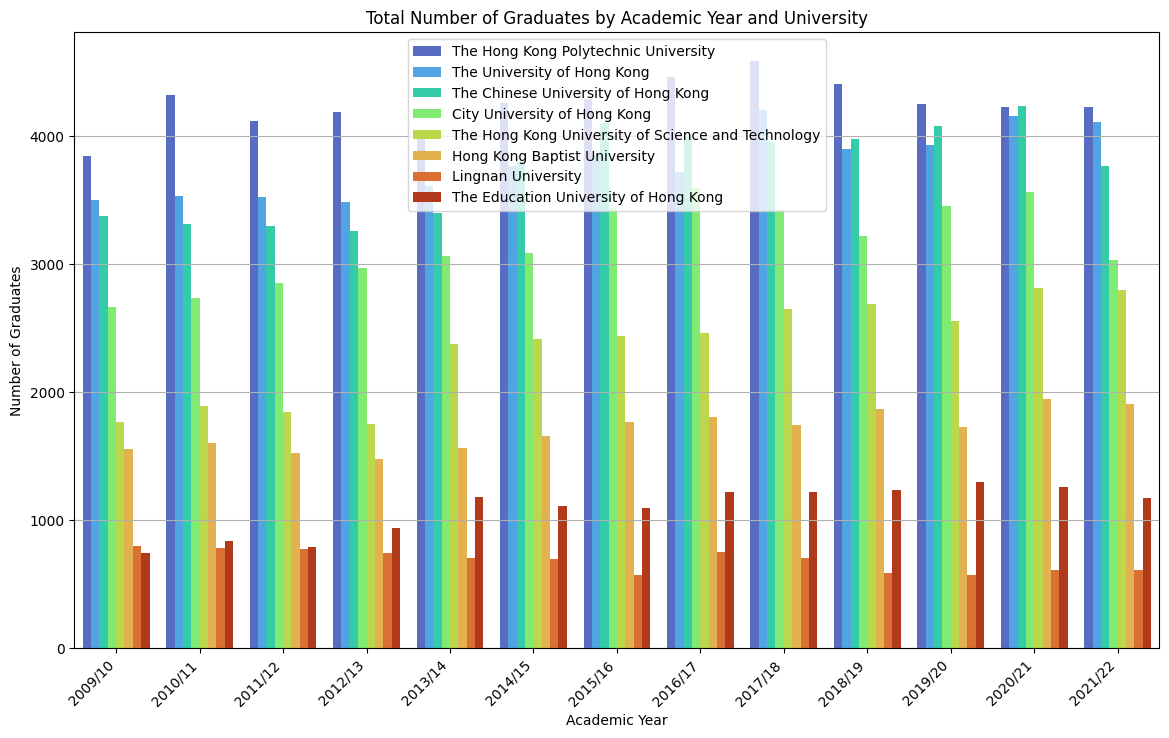

In [6]:

#for i, txt in enumerate(students_by_year['Number of Graduates (Headcount)']):
 #   plt.text(students_by_year['Academic Year'][i], txt, str(txt), ha='right', va='bottom')
students_count = hk['Number of Graduates (Headcount)'].sum()
print("Number of students:", students_count)

import seaborn as sns
total_graduates = hk.groupby(['Academic Year', 'University'])['Number of Graduates (Headcount)'].sum().reset_index()

# Сортировка данных в каждом году по убыванию количества студентов
total_graduates = total_graduates.sort_values(by=['Academic Year', 'Number of Graduates (Headcount)'], ascending=[True, False])

plt.figure(figsize=(14, 8))
sns.barplot(data=total_graduates, x='Academic Year', y='Number of Graduates (Headcount)', hue='University', palette='turbo',)
plt.title('Total Number of Graduates by Academic Year and University')
plt.xlabel('Academic Year')
plt.ylabel('Number of Graduates')
plt.grid(axis='y')

plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper center')

# Show the plot
plt.show()

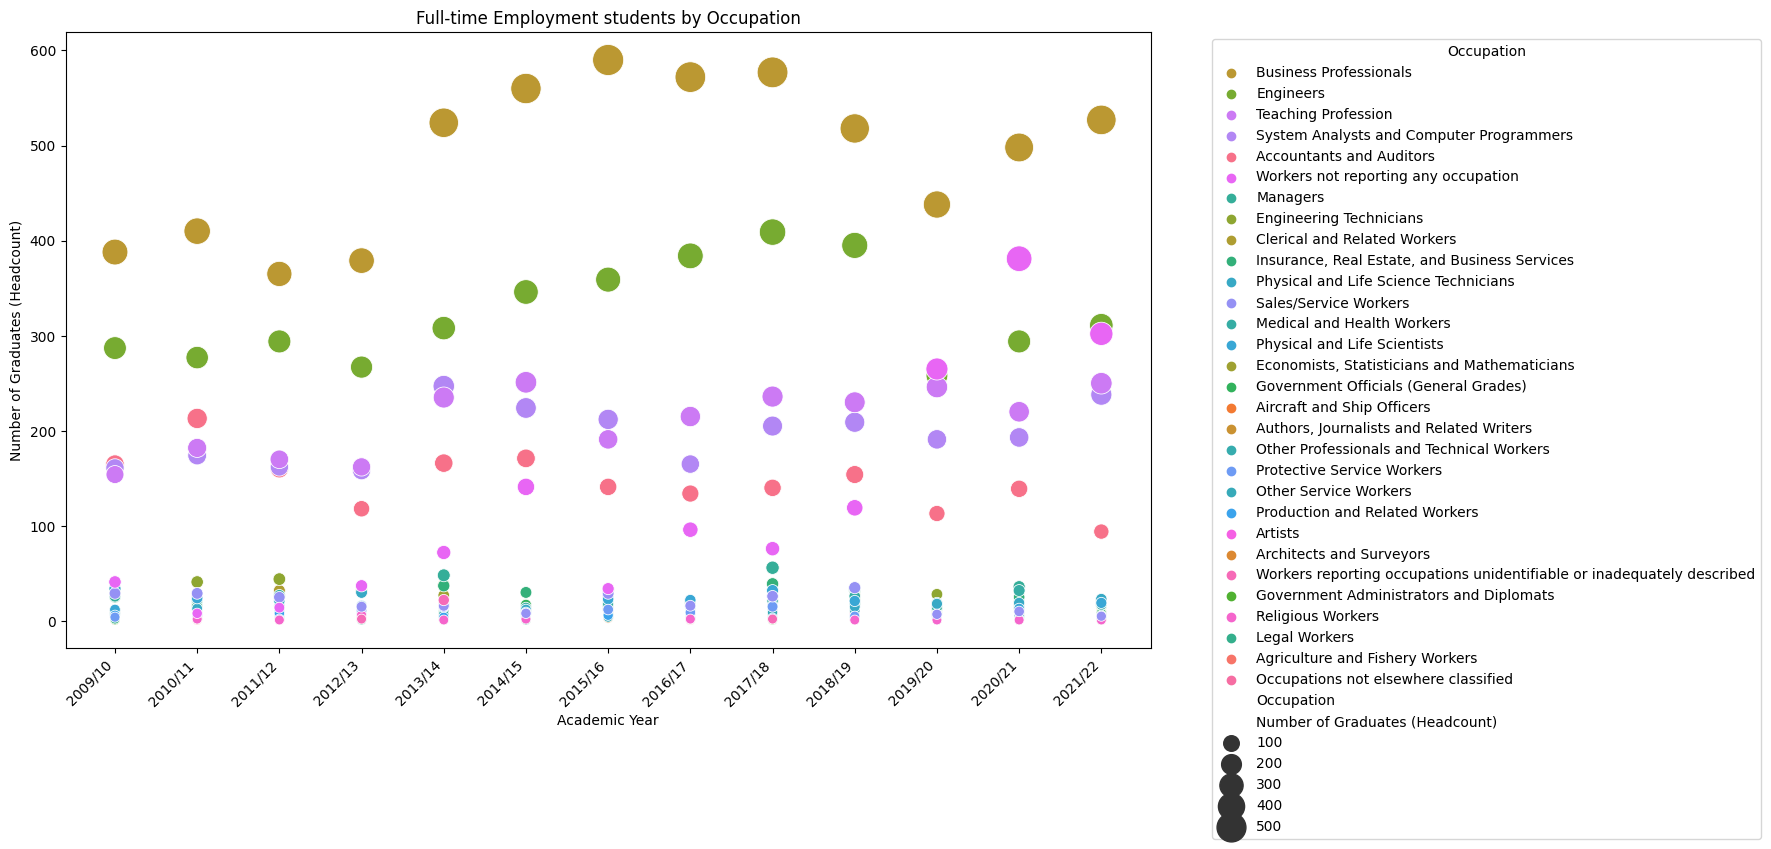

In [15]:
hkust_data = hk[hk['University'] == 'The Hong Kong University of Science and Technology']
hkust_full_time_data = hkust_data[hkust_data['Occupation'] != 'Not in Full-time Employment']

# Grouping data by 'Academic Year', 'Occupation', and 'Employment Situation', and calculating the sum
bubble_data = hkust_full_time_data.groupby(['Academic Year', 'Occupation', 'Employment Situation'])['Number of Graduates (Headcount)'].sum().reset_index()
# Plotting a bubble chart
plt.figure(figsize=(14, 8))
bubble_chart = sns.scatterplot(
    data=bubble_data,
    x='Academic Year',
    y='Number of Graduates (Headcount)',
    hue='Occupation',
    size='Number of Graduates (Headcount)',
    sizes=(50, 500)
)

plt.title('Full-time Employment students by Occupation')
plt.xlabel('Academic Year')
plt.ylabel('Number of Graduates (Headcount)')

# plt.legend edit
plt.xticks(rotation=45, ha='right')
handles, labels = bubble_chart.get_legend_handles_labels()
sorted_legend = sorted(zip(handles, labels), key=lambda x: bubble_data[bubble_data['Occupation'] == x[1]]['Number of Graduates (Headcount)'].sum(), reverse=True)
handles, labels = zip(*sorted_legend)

# Adding sorted legend manually
plt.legend(handles, labels, title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [8]:

# Grouping data by 'Occupation' and calculating the difference in the number of graduates between the first and last years
occupation_difference = hkust_data.groupby('Occupation')['Number of Graduates (Headcount)'].agg(lambda x: x.iloc[-1]).reset_index()
occupation_difference.sort_values(by = ['Number of Graduates (Headcount)'], ascending=False)

,Occupation,Number of Graduates (Headcount)
6,Business Professionals,515
10,Engineers,267
29,Workers not reporting any occupation,262
27,System Analysts and Computer Programmers,229
28,Teaching Profession,108
0,Accountants and Auditors,94
17,Not in Full-time Employment,38
21,Physical and Life Science Technicians,21
7,Clerical and Related Workers,21
16,Medical and Health Workers,15


<ipython-input-9-40c3c30b313d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  bubble_chart = sns.scatterplot(x='Occupation', y='GraduatesCount', size='GraduatesCount',


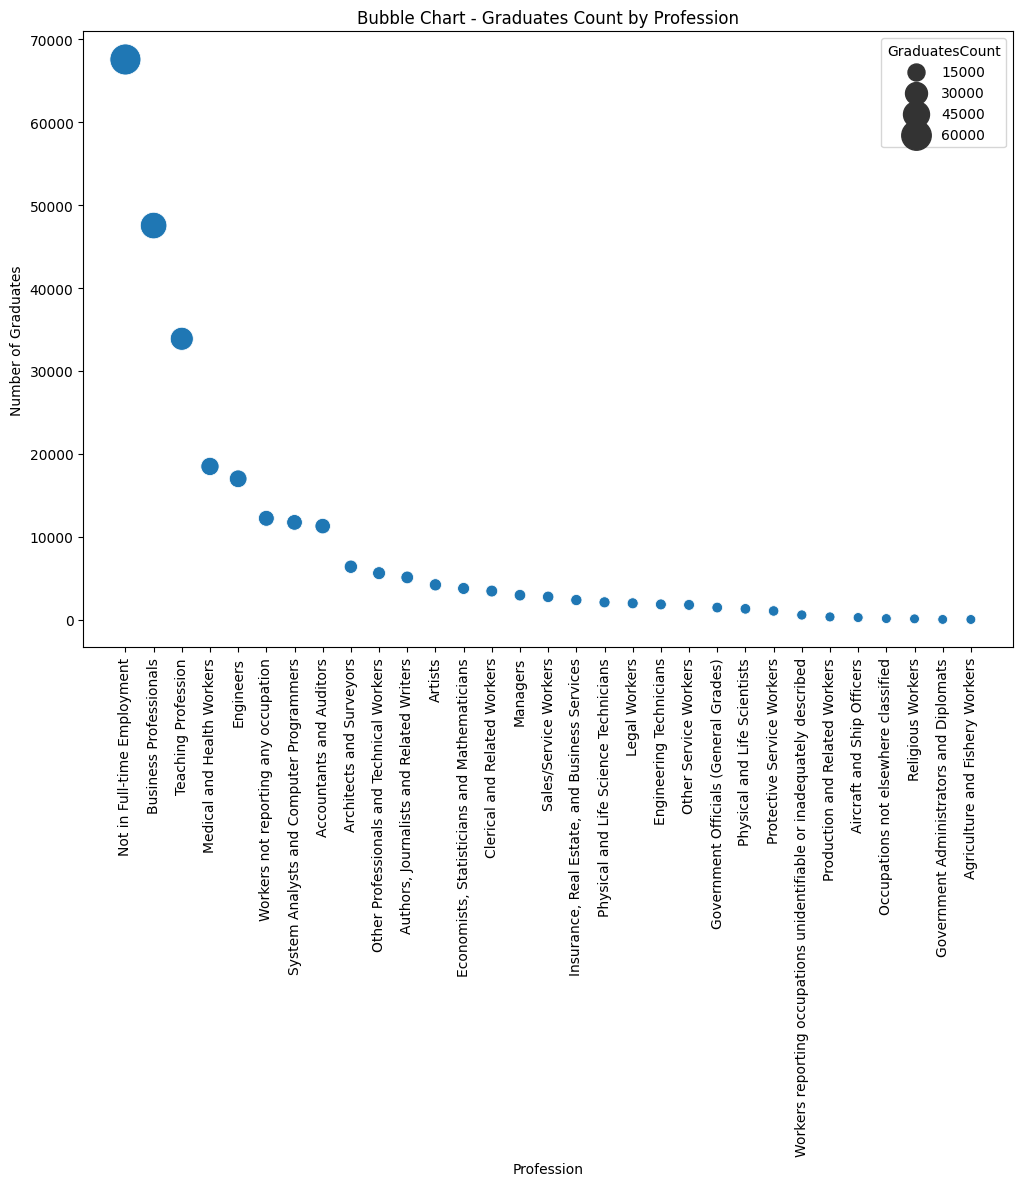

In [9]:
# Группировка данных по профессиям и подсчет количества выпускников
professions_count = hk.groupby('Occupation')['Number of Graduates (Headcount)'].sum().reset_index(name='GraduatesCount')

# Сортировка по численности в убывающем порядке
professions_count = professions_count.sort_values(by='GraduatesCount', ascending=False)
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(x='Occupation', y='GraduatesCount', size='GraduatesCount',
                               sizes=(50, 500), palette='viridis', data=professions_count)

# Добавление подписей
plt.title('Bubble Chart - Graduates Count by Profession')
plt.xlabel('Profession')
plt.ylabel('Number of Graduates')

plt.xticks(rotation=90)

plt.show()

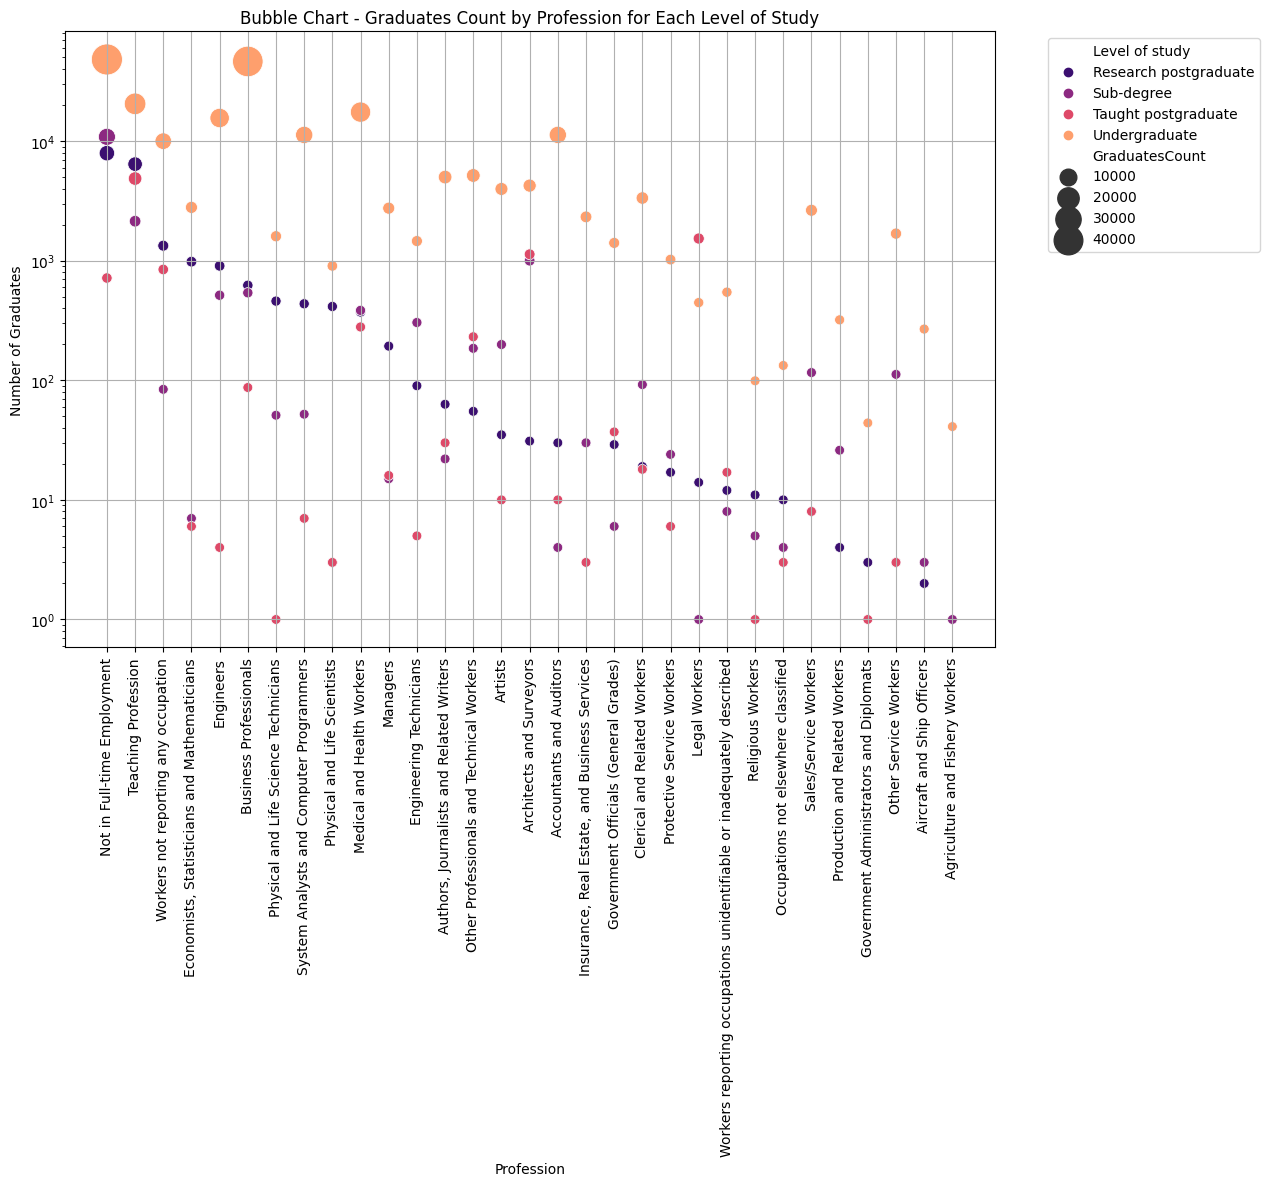

In [13]:
professions_count = hk.groupby(['Level of study', 'Occupation'])['Number of Graduates (Headcount)'].sum().reset_index(name='GraduatesCount')

# Сортировка по численности в убывающем порядке
professions_count = professions_count.sort_values(by=['Level of study', 'GraduatesCount'], ascending=[True, False])

# Графики с разными цветами для каждого уровня обучения
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(x='Occupation', y='GraduatesCount', size='GraduatesCount',
                               sizes=(50, 500), hue='Level of study', palette='magma', data=professions_count)

# Добавление подписей
plt.title('Bubble Chart - Graduates Count by Profession for Each Level of Study')
plt.xlabel('Profession')
plt.ylabel('Number of Graduates')

plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.grid(True)
plt.show()

In [11]:

selected_years = ['2009/10', '2021/22']

newdata = hk.groupby(['Academic Year', 'Occupation'])['Number of Graduates (Headcount)'].sum().reset_index()

jjj = newdata[newdata['Academic Year'].isin(selected_years)]
pivot_table = jjj.pivot(index='Occupation', columns='Academic Year', values='Number of Graduates (Headcount)').reset_index()

# Calculate the difference between '2009/10' and '2021/22'
pivot_table['Difference'] = pivot_table['2021/22'] - pivot_table['2009/10']
sorted_pivot_table = pivot_table.sort_values(by='Difference', ascending=False)

# Display the sorted result
sorted_pivot_table[['Occupation', '2009/10', '2021/22', 'Difference']]

Academic Year,Occupation,2009/10,2021/22,Difference
17,Not in Full-time Employment,4181,6157,1976
29,Workers not reporting any occupation,345,1844,1499
28,Teaching Profession,2245,2733,488
16,Medical and Health Workers,1171,1503,332
27,System Analysts and Computer Programmers,813,1127,314
10,Engineers,1027,1207,180
8,"Economists, Statisticians and Mathematicians",264,413,149
15,Managers,164,288,124
22,Physical and Life Scientists,74,139,65
4,Artists,274,294,20


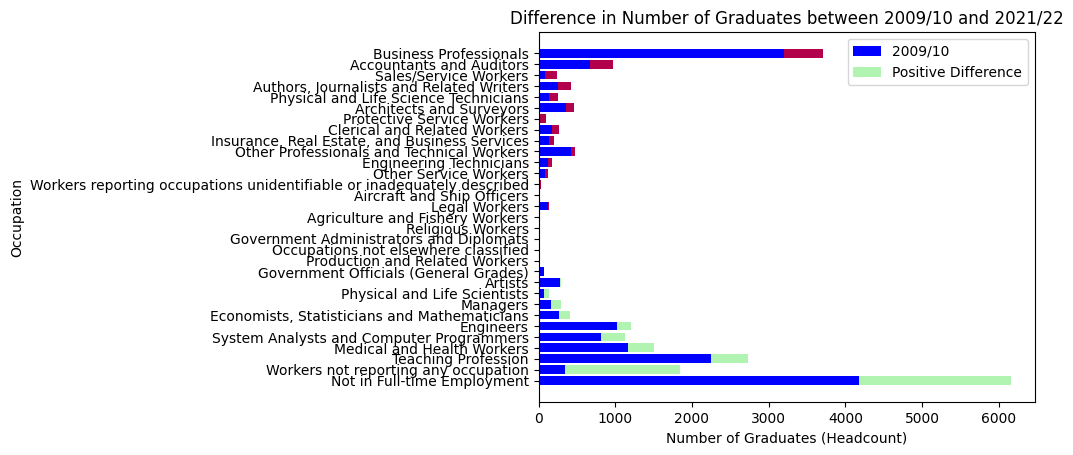

In [12]:
plt.barh(sorted_pivot_table['Occupation'], sorted_pivot_table['2009/10'],
         color='blue', label='2009/10')
colors = ['red' if diff < 0 else 'lightgreen' for diff in sorted_pivot_table['Difference']]
plt.barh(sorted_pivot_table['Occupation'], sorted_pivot_table['Difference'],
         left=sorted_pivot_table['2009/10'], color=colors, alpha=0.7, label='Difference')
plt.xlabel('Number of Graduates (Headcount)')
plt.ylabel('Occupation')
plt.title('Difference in Number of Graduates between 2009/10 and 2021/22')

legend_labels = ['2009/10', 'Positive Difference','Negative Difference']
plt.legend(labels=legend_labels)
#plt.xscale('log')
plt.show()